<a id='section_id0'></a>
# Data Programming Essentials *with Python*

### Final: Sleep duration among high school students 
### Part 1 Exploratory Analysis

<font color="#740202">**Table of contents:**

|No.|Topic||No.|Topic||No.|Topic|
|:------|:------||:------|:------||:------|:------|
|1.|[Plotting Libraries](#section_id1)||2.|[Load and Check Data](#section_id2)||3.|[Data Distribution](#section_id3)  |
|4.|[Relating Variables](#section_id4)  ||5.|[Saving files](#section_id5)  |


***

<a id='section_id1'></a>
### <span style="background-color:#B0E0E6">Plotting libraries</span>
* We'll use the [Seaborn library](https://seaborn.pydata.org/tutorial.html), [Matplotlib](https://matplotlib.org/), and [Folium (for maps)](https://python-visualization.github.io/folium/). These are easy entry points and are very popular packages.
* Check out these cheat sheets:
    * [Data visualization with Seaborn](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Python_Seaborn_Cheat_Sheet.pdf)
    * [Plotting with Matplotlib](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Python_Matplotlib_Cheat_Sheet.pdf)
    * [Interactive maps with Folium](https://andrewchallis.co.uk/wp-content/uploads/2017/12/Folium.pdf)

<a id='section_id2'></a>
### <span style="background-color:#B0E0E6">Data check</span>

#### Get started by cleaning data
* Read the dataset. We can set NA values as we initially read the CSV file.
    

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read the CSV file after taking a good look at the data dictionary.
# note from the data dictionary that values such as -5, -4, -3, -2, -1 can be treated as NA.

df = pd.read_csv('yrbsdata.csv', dtype='object')

In [3]:
df.head(3)

,sitecode,sitename,sitetype,sitetypenum,year,survyear,weight,stratum,PSU,record,...,qwenthungry,qmusclestrength,qsunscreenuse,qindoortanning,qsunburn,qconcentrating,qcurrentasthma,qwheresleep,qspeakenglish,qtransgender
0,KY,Kentucky (KY),State,2,2007,9,51.6402,28,2,648526,...,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN
1,KY,Kentucky (KY),State,2,2007,9,104.2187,18,2,648527,...,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN
2,KY,Kentucky (KY),State,2,2007,9,33.2209,6,2,648528,...,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN


In [4]:
df.shape

(962925, 150)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962925 entries, 0 to 962924
Columns: 150 entries, sitecode to qtransgender
dtypes: object(150)
memory usage: 1.1+ GB


* The above view is truncated becuase there are a large number of columns in the dataset. To enable the scroll bar, we can use the pd.set_option() function to set the max_rows and max_columns to None.

In [6]:
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

* Read the dataset: note my use of *dtype* and the specification of NA values

In [7]:
df.dtypes

sitecode            object
sitename            object
sitetype            object
sitetypenum         object
year                object
survyear            object
weight              object
stratum             object
PSU                 object
record              object
age                 object
sex                 object
grade               object
race4               object
race7               object
stheight            object
stweight            object
bmi                 object
bmipct              object
qnobese             object
qnowt               object
q67                 object
q66                 object
sexid               object
sexid2              object
sexpart             object
sexpart2            object
q8                  object
q9                  object
q10                 object
q11                 object
q12                 object
q13                 object
q14                 object
q15                 object
q16                 object
q17                 object
q

In [8]:
states=df[['q88','sitecode', 'age']]
states.head(3)

,q88,sitecode,age
0,NaN,KY,7
1,NaN,KY,7
2,NaN,KY,7


In [9]:
states.shape

(962925, 3)

In [10]:
states= states.dropna()
states = states.reset_index(drop=True)

In [11]:
states.shape

(243691, 3)

In [12]:
states.isna().sum().sum()

0

In [13]:
states.loc[:,'q88']=pd.to_numeric(states.loc[:,'q88'], errors='coerce')
states.loc[:,'age']=pd.to_numeric(states.loc[:,'age'], errors='coerce')

* draw maps

In [14]:
import folium

In [15]:
url = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data'
state_geo = f'{url}/us-states.json' # for US map with state boundaries


In [16]:
map1 = folium.Map(location=[48, -102], zoom_start=3)

In [17]:
folium.Choropleth(
    geo_data=state_geo,
    name='choropleth',
    data=states,
    columns=['sitecode', 'q88'],
    key_on='feature.id',
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='sleeping hours count'
).add_to(map1)

In [18]:
folium.LayerControl().add_to(map1)

In [19]:
map1

In [20]:
map1.save('state_sleeping.html')

* Among 38 states being surveyed, around 75% of them have short sleep duration problem (less than 8 hours per school day). 

Loading a saved html file into Jupyter:

In [21]:
# Import the Folium interactive html file
from IPython.display import HTML
HTML('<iframe src=state_sleeping.html width=700 height=450></iframe>')

C:\Users\edwar\anaconda3\lib\site-packages\IPython\core\display.py:701: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


In [22]:
states.rename(columns={'q88': 'sleeping'},inplace=True) # Rename one column
states.columns

Index(['sleeping', 'sitecode', 'age'], dtype='object')

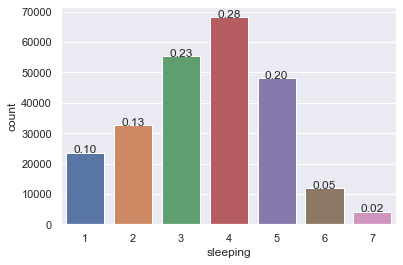

In [23]:
from matplotlib.pyplot import show
import seaborn as sns
sns.set(style="darkgrid")

total = float(len(states)) # one person per row 
#ax = sns.barplot(x="sleeping", hue="sitecode", data=states)
ax = sns.countplot(x="sleeping", data=states) # for Seaborn version 0.7 and more
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/total),
            ha="center") 
show()

* As we can see from the graph, about 27% students sleep 8 or more hours per school night, which means about 73% students have insufficient sleep.  

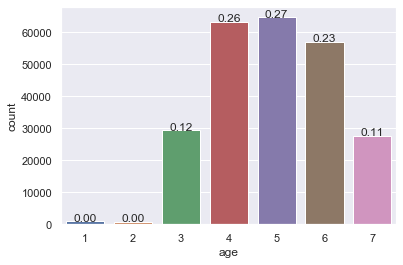

In [24]:
ax = sns.countplot(x="age",data=states) # for Seaborn version 0.7 and more

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/total),
            ha="center") 

show()



* Our data includes only students from > = 14 years old to 18 years old or older, so the cut off line for short sleeping duration is whether the sleeping hours are less than 8 hours.


In [25]:
#states[states.sleeping>=5].shape[0] 

In [26]:
#wgt = states[states.sleeping>=5]
#wgt

In [27]:
#total = states[states.sleeping<8]
#total.shape

In [28]:
#t=states.groupby(['sitecode']).count()
#t.shape

In [29]:
#t.head(3)

In [30]:
#t.rename(columns={'sleeping': 'total'}, inplace=True) # Rename age column to reflect count
#t.head(3)

In [31]:
#agg=pd.crosstab(total.sitecode, total.sleeping, margins=True)
#agg

In [32]:
#agg.shape

In [33]:
#more = pd.crosstab(wgt.sitecode, wgt.sleeping, margins=True)
#more

In [34]:
#more.shape

In [35]:
#more = pd.crosstab(wgt.sitecode, wgt.sleeping, margins=True)
#more

In [36]:
# What are the unique values present in this column?
df['q88'].unique() # sleep hours on an averge school night

array([nan, '5', '4', '2', '1', '3', '6', '7'], dtype=object)

In [37]:
df['sitecode'].unique() # self-reported grade

array(['KY', 'LA', 'AL', 'ID', 'HI', 'IL', 'MS', 'MT', 'AK', 'AR', 'ME',
       'MO', 'IA', 'MI', 'DE', 'FL', 'AZB', 'CO', 'KS', 'CA', 'NE', 'SC',
       'SD', 'UT', 'NC', 'NH', 'NV', 'TN', 'WI', 'WV', 'ND', 'WY', 'NY',
       'RI', 'NJ', 'OK', 'PA', 'VA'], dtype=object)

In [38]:
df['race4'].unique() # self-reported grade

array(['1', '4', '2', nan, '3'], dtype=object)

In [39]:
df['q81'].unique()

array(['2', '4', '3', nan, '1', '5', '7', '6'], dtype=object)

In [40]:
df['q88'].unique()

array([nan, '5', '4', '2', '1', '3', '6', '7'], dtype=object)

In [41]:
df['q32'].unique()

array(['1', '3', '7', '2', nan, '4', '5', '6'], dtype=object)

In [42]:
df['q20'].unique()

array([nan, '1', '5', '2', '3', '4'], dtype=object)

In [43]:
df['q33'].unique()

array(['1', '2', '3', '5', '6', '7', nan, '4'], dtype=object)

* Researchers suggested that drinking habit, eating habit, playing computers, smoking cigarettes, and sexual hurassment are associated with short sleep duraion.
* We include such variables in YRBS SURVEY 2017 to predict their influences on sleeping hours among high school students.

In [44]:
df1=df[['q88','sex', 'race4', 'q20', 'q32', 'q75', 'q76', 'q78', 'q81']]
df1.head(3)

,q88,sex,race4,q20,q32,q75,q76,q78,q81
0,NaN,1,1,NaN,1,5,3,NaN,2
1,NaN,1,1,NaN,1,1,2,NaN,4
2,NaN,1,4,NaN,3,2,2,NaN,3


In [45]:
df1.shape

(962925, 9)

* We now drop all rows containing NaN values and reset index for the dataset df1.

In [46]:
df1 = df1.dropna()
df1 = df1.reset_index(drop=True)

* Check if there is any changes of data size.

In [47]:
df1.shape

(36220, 9)

* Check the amount of missing values in each column.

In [48]:
df1.isna().sum()

q88      0
sex      0
race4    0
q20      0
q32      0
q75      0
q76      0
q78      0
q81      0
dtype: int64

* Check the total missing values of df1.

In [49]:
df1.isna().sum().sum()

0

In [50]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36220 entries, 0 to 36219
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   q88     36220 non-null  object
 1   sex     36220 non-null  object
 2   race4   36220 non-null  object
 3   q20     36220 non-null  object
 4   q32     36220 non-null  object
 5   q75     36220 non-null  object
 6   q76     36220 non-null  object
 7   q78     36220 non-null  object
 8   q81     36220 non-null  object
dtypes: object(9)
memory usage: 2.5+ MB


* Now one more step to go: converting the data types using functions like `.astype(int)` or `pd.to_numeric()`.

In [51]:
df1.loc[:,'q88']=pd.to_numeric(df1.loc[:,'q88'], errors='coerce')
df1.loc[:,'sex']=pd.to_numeric(df1.loc[:,'sex'], errors='coerce')
df1.loc[:,'race4']=pd.to_numeric(df1.loc[:,'race4'], errors='coerce')
df1.loc[:,'q20']=pd.to_numeric(df1.loc[:,'q20'], errors='coerce')
df1.loc[:,'q32']=pd.to_numeric(df1.loc[:,'q32'], errors='coerce')
df1.loc[:,'q75']=pd.to_numeric(df1.loc[:,'q75'], errors='coerce')
df1.loc[:,'q76']=pd.to_numeric(df1.loc[:,'q76'], errors='coerce')
df1.loc[:,'q78']=pd.to_numeric(df1.loc[:,'q78'], errors='coerce')
df1.loc[:,'q81']=pd.to_numeric(df1.loc[:,'q81'], errors='coerce')

In [52]:
df1.describe() # find the range of each column except V253 size of town

,q88,sex,race4,q20,q32,q75,q76,q78,q81
count,36220.000000,36220.000000,36220.000000,36220.000000,36220.000000,36220.000000,36220.000000,36220.000000,36220.000000
mean,3.508007,1.481336,2.064633,1.186554,1.250028,2.556102,2.410574,5.098896,3.930204
std,1.398969,0.499658,1.226763,0.631294,0.988877,1.360694,1.490681,2.657106,2.191636
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,5.000000,4.000000
75%,4.000000,2.000000,3.000000,1.000000,1.000000,3.000000,3.000000,8.000000,6.000000
max,7.000000,2.000000,4.000000,5.000000,7.000000,7.000000,7.000000,8.000000,7.000000


* For convenience, we rename each column to make the names more informative.

In [53]:
# rename some columns

df1.rename(columns={'q88': 'sleeping','race4': 'race', 'q76': 'soda',
                   'q81': 'computer', 'q75': 'vegetables', 'q32': 'smoking', 
                   'q20': 'sexharass', 'q78': 'breakfast'}, inplace=True) # Rename one column
df1.columns

Index(['sleeping', 'sex', 'race', 'sexharass', 'smoking', 'vegetables', 'soda',
       'breakfast', 'computer'],
      dtype='object')

In [54]:
df1.head(3)

,sleeping,sex,race,sexharass,smoking,vegetables,soda,breakfast,computer
0,1,2,4,4,4,3,2,3,3
1,1,2,3,1,1,2,1,1,2
2,1,2,4,1,1,1,1,1,1


* Now, we begin our data visuliazing process.

<a id='section_id3'></a>
### <span style="background-color:#B0E0E6">Visualizing the distribution of a dataset</span>

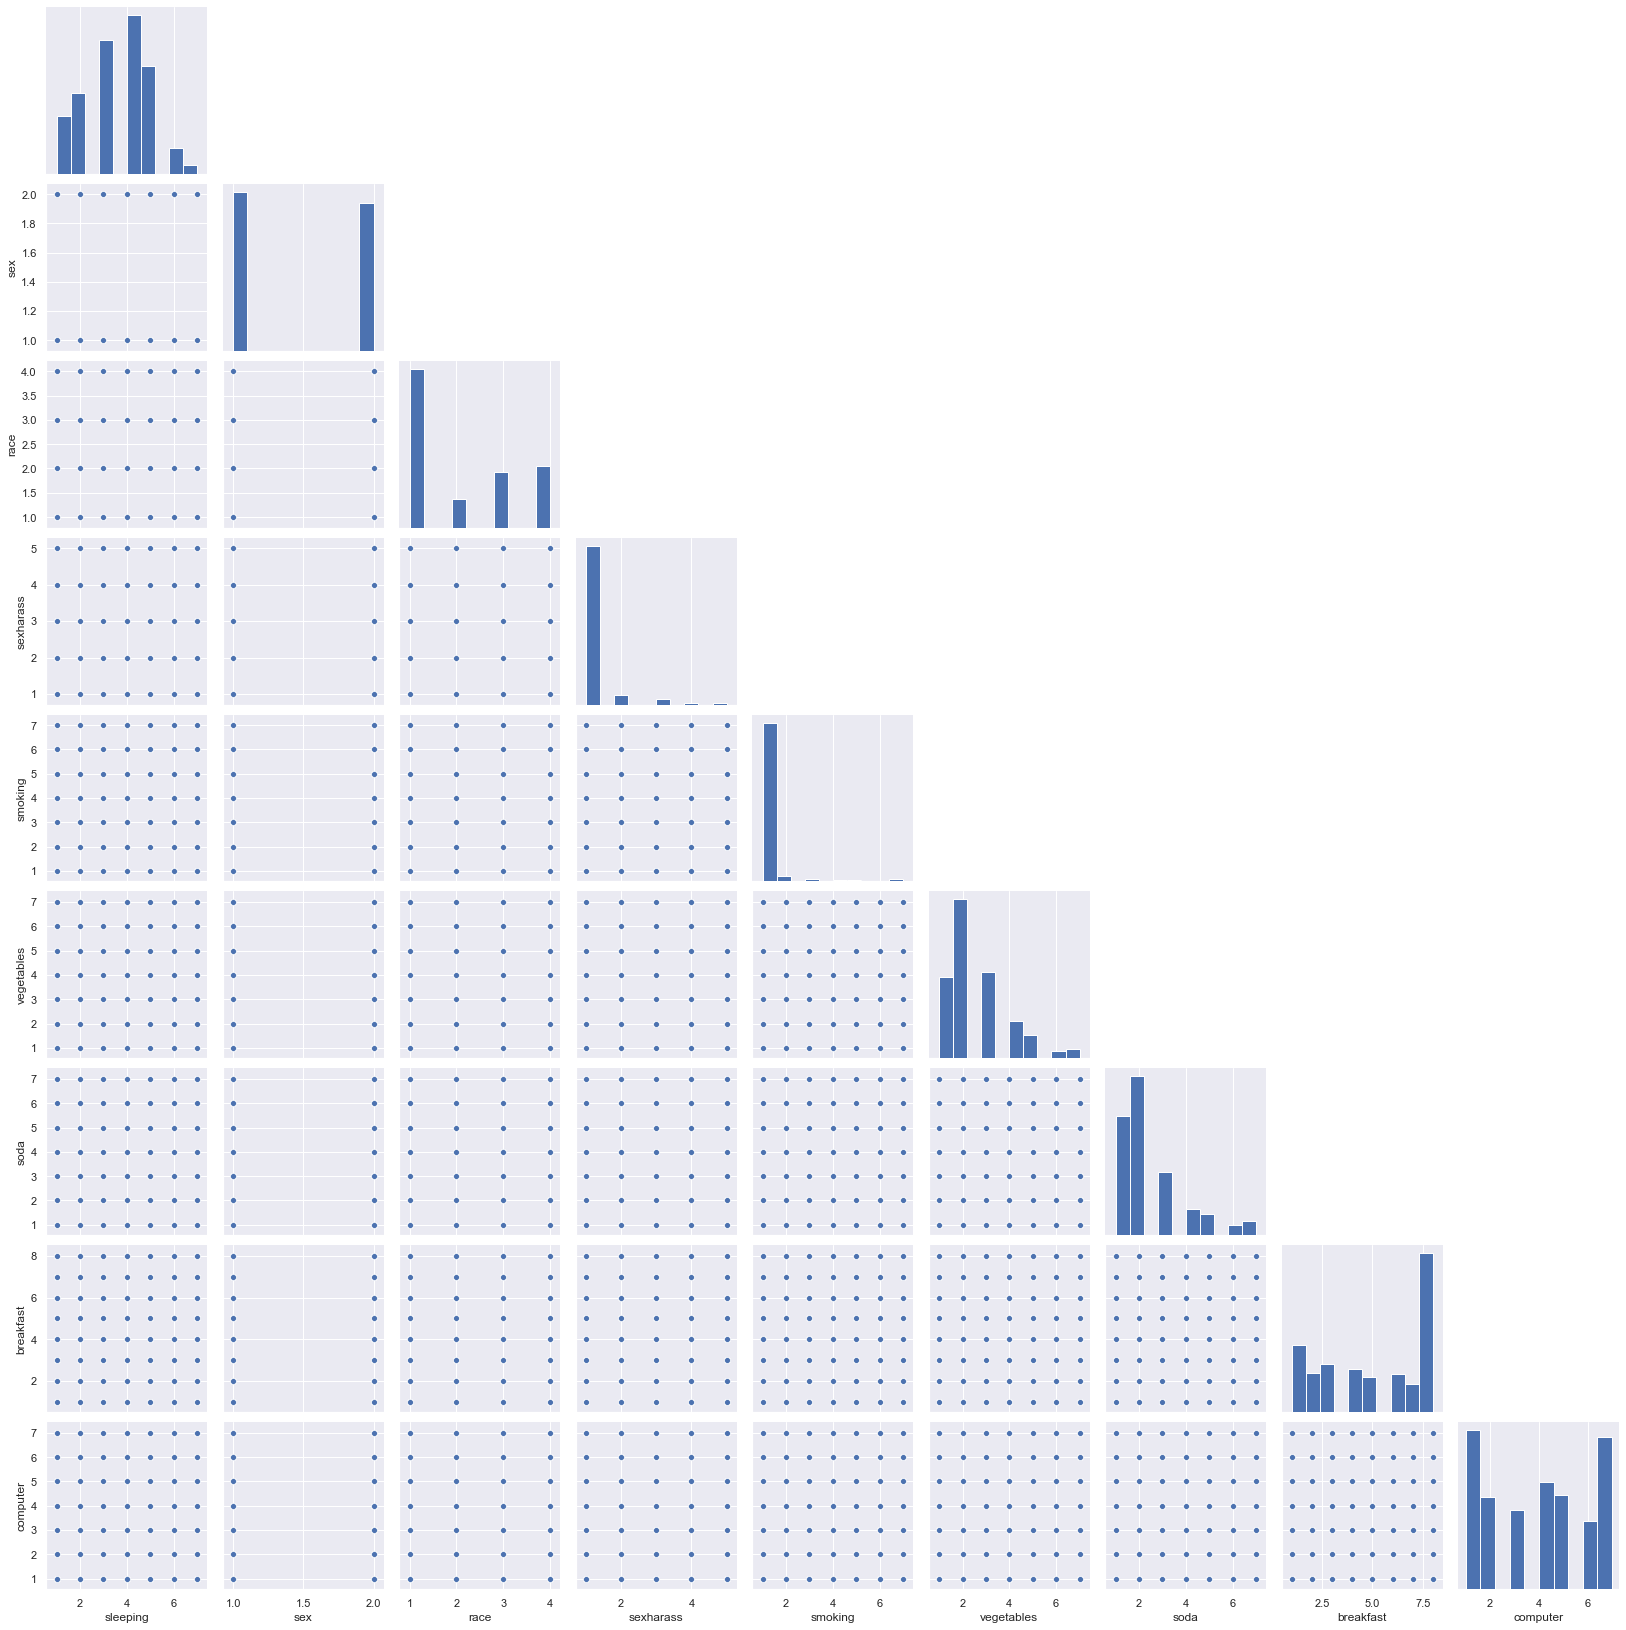

In [55]:
sns.pairplot(df1, corner = True)

* Smoking cigarettes and sexual hurassment are right skewed.

<a id='section_id4'></a>
### <span style="background-color:#B0E0E6">Relating variables</span>

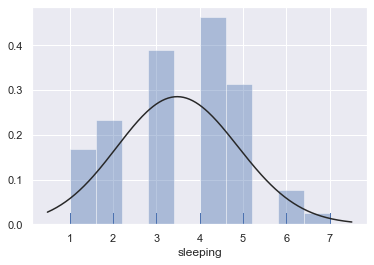

In [56]:
sns.distplot(df1['sleeping'], bins=10, kde=False, rug=True, hist=True, fit=stats.gamma)

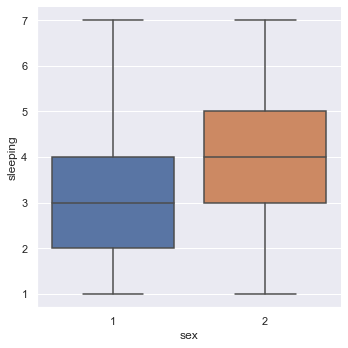

In [57]:
sns.catplot(x='sex', y='sleeping', kind="box", data=df1)

* On average, female students sleep less than male students.

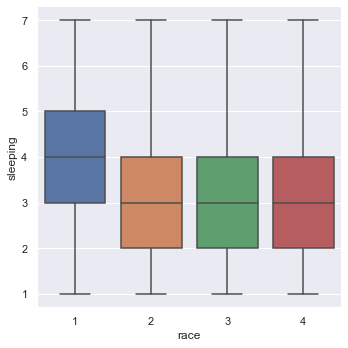

In [58]:
sns.catplot(x='race', y='sleeping', kind="box", data=df1)

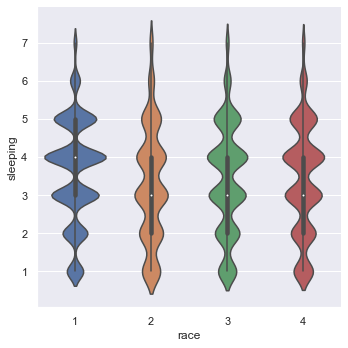

In [59]:
sns.catplot(x='race', y='sleeping', kind="violin", data=df1)

* On average, white students sleep 7 hours per school day, whereas students from other races sleep 5 hours per school day.

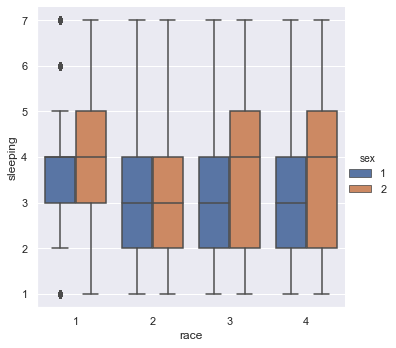

In [60]:
sns.catplot(x='race', y='sleeping', hue="sex", kind="box", data=df1)
# race: 1=white, 2=African American, 3=Hispanic/Latino, 4=All other races

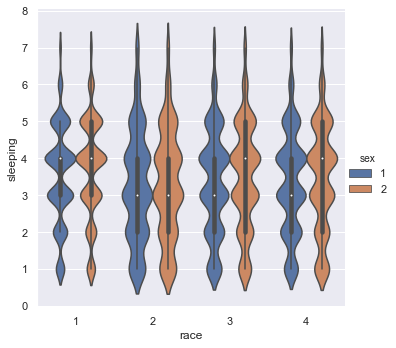

In [61]:
sns.catplot(x='race', y='sleeping', hue="sex", kind="violin", data=df1)

* On average, among Hispanic and other races students, females tend to sleep less than male students. While among white and African American students, females has the same sleeping hours as males.

C:\Users\edwar\anaconda3\lib\site-packages\seaborn\axisgrid.py:728: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


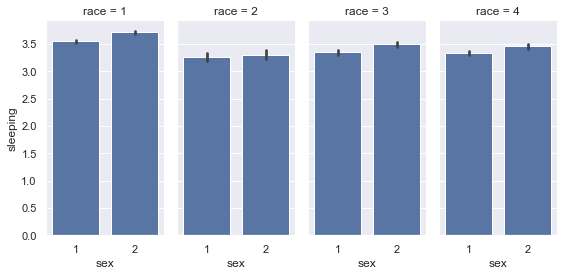

In [62]:
g = sns.FacetGrid(df1, col="race", height=4, aspect=.5 )
g.map(sns.barplot, "sex", "sleeping", ci=95)

* Let's combine race and sex to see their influence on sleeping hours. There is not much difference between genders among races regarding sleeping hours per school day.
* White students sleep more than other races students.
* Male students tend to sleep a bit more than female students.

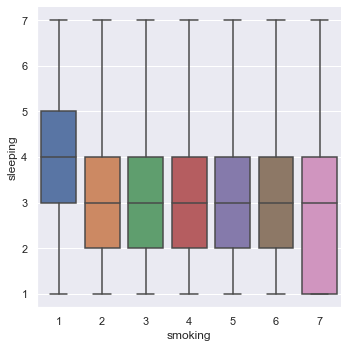

In [63]:
sns.catplot(x='smoking', y='sleeping', kind="box", data=df1)
# performance: 1-mostly A,2-mostly B, 3-mostly C, 4-mostly D, 5-mostly F, 6-none of these grades, 7-not sure
# sleeping hours: 1.<= 4 hrs, 2. 5 hrs, 3. 5 hrs, 4. 7 hrs, 5. 8 hrs, 6. 9 hrs, 7. >=10 hrs
# smoking per day: 1=no, 2-<1, 3=1/day, 4=2 to 5, 5=6-10, 6= 11-20, 7= >20/day

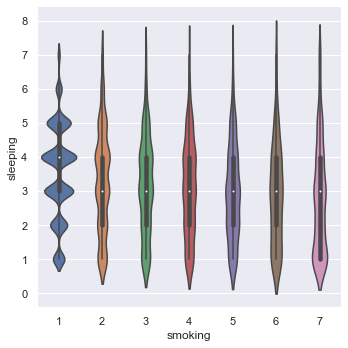

In [64]:
sns.catplot(x='smoking', y='sleeping', kind="violin", data=df1)
# performance: 1-mostly A,2-mostly B, 3-mostly C, 4-mostly D, 5-mostly F, 6-none of these grades, 7-not sure
# sleeping hours: 1.<= 4 hrs, 2. 5 hrs, 3. 5 hrs, 4. 7 hrs, 5. 8 hrs, 6. 9 hrs, 7. >=10 hrs
# smoking per day: 1=no, 2-<1, 3=1/day, 4=2 to 5, 5=6-10, 6= 11-20, 7= >20/day

* On average, students who never smoke cigarettes sleep longer than the one who does.

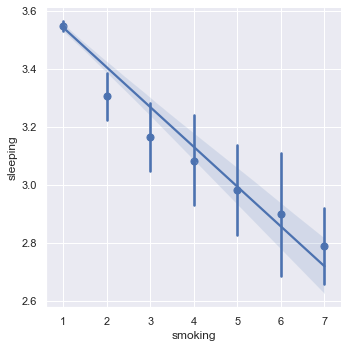

In [65]:
sns.lmplot(x="smoking", y="sleeping", data=df1, x_estimator=np.mean)

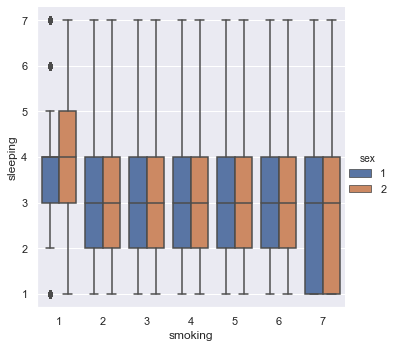

In [66]:
sns.catplot(x='smoking', y='sleeping', hue="sex", kind="box", data=df1)
# smoking per day: 1=no, 2-<1, 3=1/day, 4=2 to 5, 5=6-10, 6: 11-20, 7= >20/day

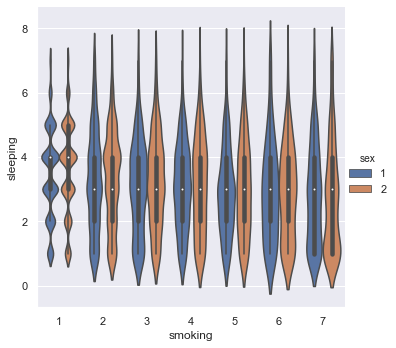

In [67]:
sns.catplot(x='smoking', y='sleeping', hue="sex", kind="violin", data=df1)
# smoking per day: 1=no, 2-<1, 3=1/day, 4=2 to 5, 5=6-10, 6: 11-20, 7= >20/day

* On average, among students who never smoke cigarretes, female has the same sleep duration as males. That is, the relationship between smoking and sleeping does not depend on gender.

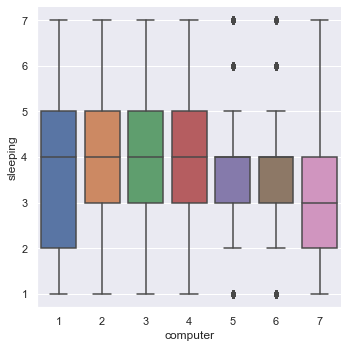

In [68]:
sns.catplot(x='computer', y='sleeping', kind="box", data=df1)
# playing with computer: 1=no, 2=<1h/day, 3=1h, 4=2hs, 5=3hrs, 6=4hrs, 7=>=5hrs

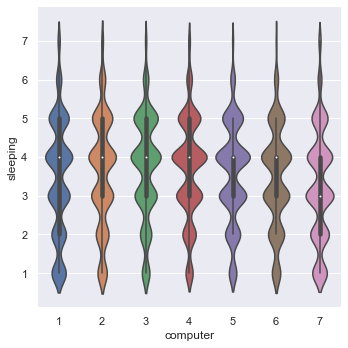

In [69]:
sns.catplot(x='computer', y='sleeping', kind="violin", data=df1)
# playing with computer: 1=no, 2=<1h/day, 3=1h, 4=2hs, 5=3hrs, 6=4hrs, 7=>=5hrs

* On average, students who spend 5 or more hours per school day on computer games sleep less than other students who spend less than 5 hours. (computer addiction)

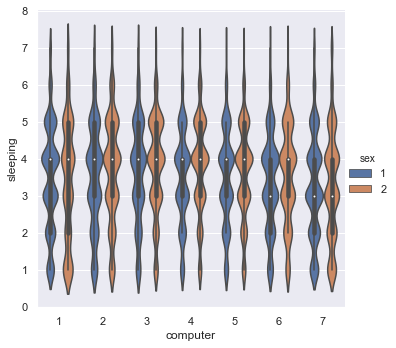

In [70]:
sns.catplot(x='computer', y='sleeping', hue = "sex", kind="violin", data=df1)

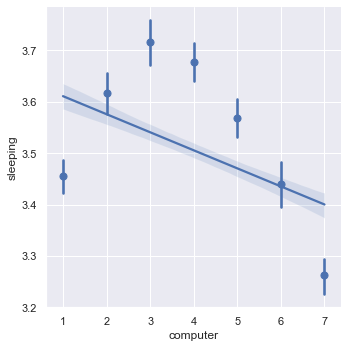

In [71]:
sns.lmplot(x="computer", y="sleeping", data=df1, x_estimator=np.mean)

* On average, only among students who spend 4 hours per school day on computer games, females sleep less than males. Thus, gender has little effect on the relationship between playing computer and sleeping hours. 

In [72]:
df1.describe()

,sleeping,sex,race,sexharass,smoking,vegetables,soda,breakfast,computer
count,36220.000000,36220.000000,36220.000000,36220.000000,36220.000000,36220.000000,36220.000000,36220.000000,36220.000000
mean,3.508007,1.481336,2.064633,1.186554,1.250028,2.556102,2.410574,5.098896,3.930204
std,1.398969,0.499658,1.226763,0.631294,0.988877,1.360694,1.490681,2.657106,2.191636
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,5.000000,4.000000
75%,4.000000,2.000000,3.000000,1.000000,1.000000,3.000000,3.000000,8.000000,6.000000
max,7.000000,2.000000,4.000000,5.000000,7.000000,7.000000,7.000000,8.000000,7.000000


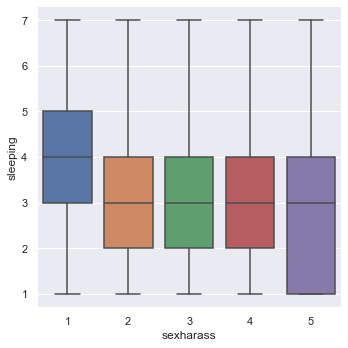

In [73]:
sns.catplot(x='sexharass', y='sleeping', kind="box", data=df1)
# sexual harassment counts: 1=0 times, 2=1 time, 3=2 or 3 times, 4 = 4 or 5 times, 5 = >=6 times

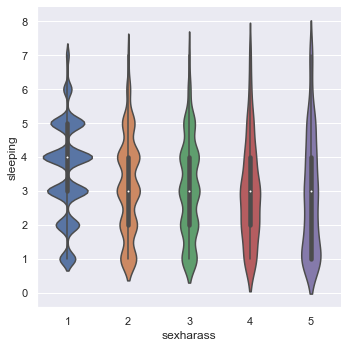

In [74]:
sns.catplot(x='sexharass', y='sleeping', kind="violin", data=df1)

* On average, students who have experience of sexual harassment sleep less than the ones who haven't. 
* could combine as yes or no classes: cut: 0,1,6

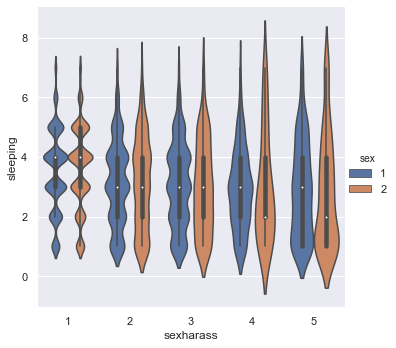

In [75]:
sns.catplot(x='sexharass', y='sleeping', hue = "sex", kind="violin", data=df1)

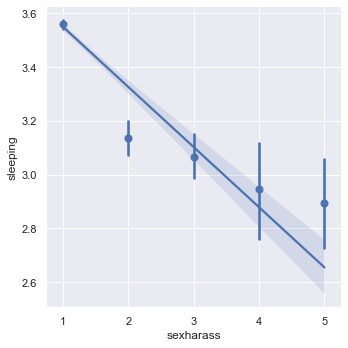

In [76]:
sns.lmplot(x="sexharass", y="sleeping", data=df1, x_estimator=np.mean)

* On average, among students who was frequently sexually harassed (> 4 times), males sleep less than females.

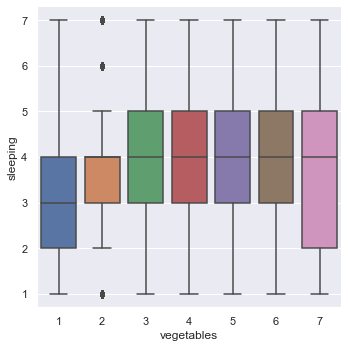

In [77]:
sns.catplot(x='vegetables', y='sleeping', kind="box", data=df1)
# physical class attend/week: 1 = 0 day, 2 = 1 day, 3 = 2 days, 4 = 3 days, 5 = 4 days,  6 = 5 days

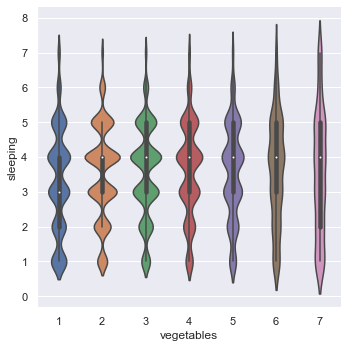

In [78]:
sns.catplot(x='vegetables', y='sleeping', kind="violin", data=df1)
#eating other vegetables: 1 = 0 time, 2 = 1 to 3 times/week, 3 = 4-6, 4 = 1 time/day, 5 = 2 times/day,  6 = 3/day, 7 = >4/day

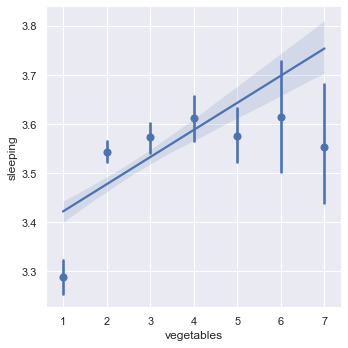

In [79]:
sns.lmplot(x="vegetables", y="sleeping", data=df1, x_estimator=np.mean)

In [80]:
# try later
#tips["big_tip"] = (tips.tip / tips.total_bill) > .15
#sns.lmplot(x="total_bill", y="big_tip", data=tips,
           #y_jitter=.03)
#sns.lmplot(x="total_bill", y="big_tip", data=tips, logistic=True, y_jitter=.03)

* On average, eating vegetables (excluding green salad, patatoes or carrots) at least 1 time per week could help students sleep more.
* could categorized as 2 groups: eating or not/week. cut: 0,1,8

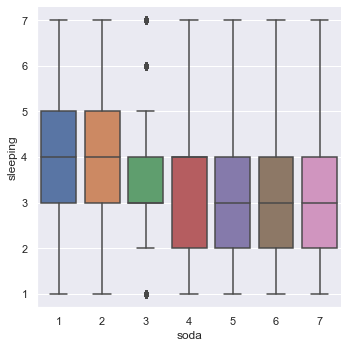

In [81]:
sns.catplot(x='soda', y='sleeping', kind="box", data=df1)
# drinking soda: 1 = 0/week, 2 = 1-3 times, 3 = 4-6 times, 4 = 1/day, 5 = 2/day,  6 = 3/day, 7=>4/day

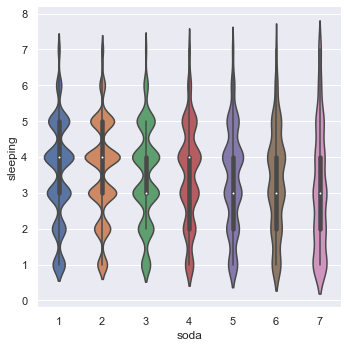

In [82]:
sns.catplot(x='soda', y='sleeping', kind="violin", data=df1)

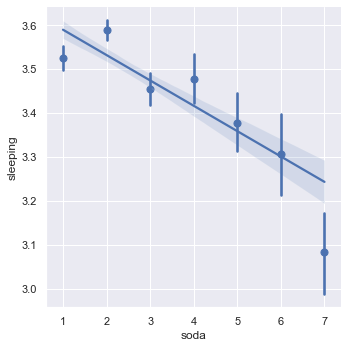

In [83]:
sns.lmplot(x="soda", y="sleeping", data=df1, x_estimator=np.mean)

* On average, the more the soda students drink per week, the less they sleep per school day.

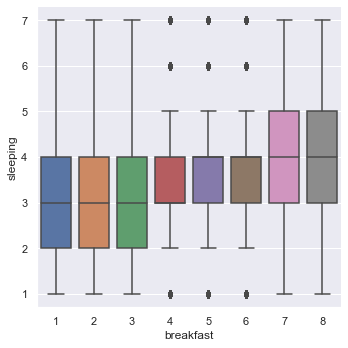

In [84]:
sns.catplot(x='breakfast', y='sleeping', kind="box", data=df1)
# 1=0 days, 2= 1 day, 3 = 2 days, 4 = 3 days, 5 = 4 days, 6 = 5 days, 7 = 6 days, 8 = 7 days/week

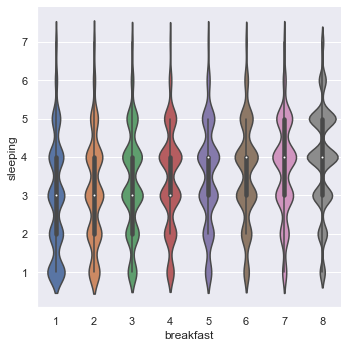

In [85]:
sns.catplot(x='breakfast', y='sleeping', kind="violin", data=df1)
# 1=0 days, 2= 1 day, 3 = 2 days, 4 = 3 days, 5 = 4 days, 6 = 5 days, 7 = 6 days, 8 = 7 days/week

* The more days students eat breakfast per week, the longer they sleep per shool day.

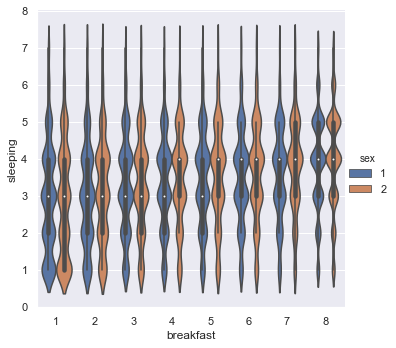

In [86]:
sns.catplot(x='breakfast', y='sleeping', hue = 'sex', kind="violin", data=df1)

* On average, there is not much difference between females and males regarding the effect of eatting breakfast on sleeping hours.

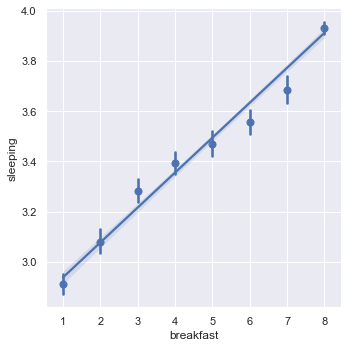

In [87]:
sns.lmplot(x="breakfast", y="sleeping", data=df1, x_estimator=np.mean)

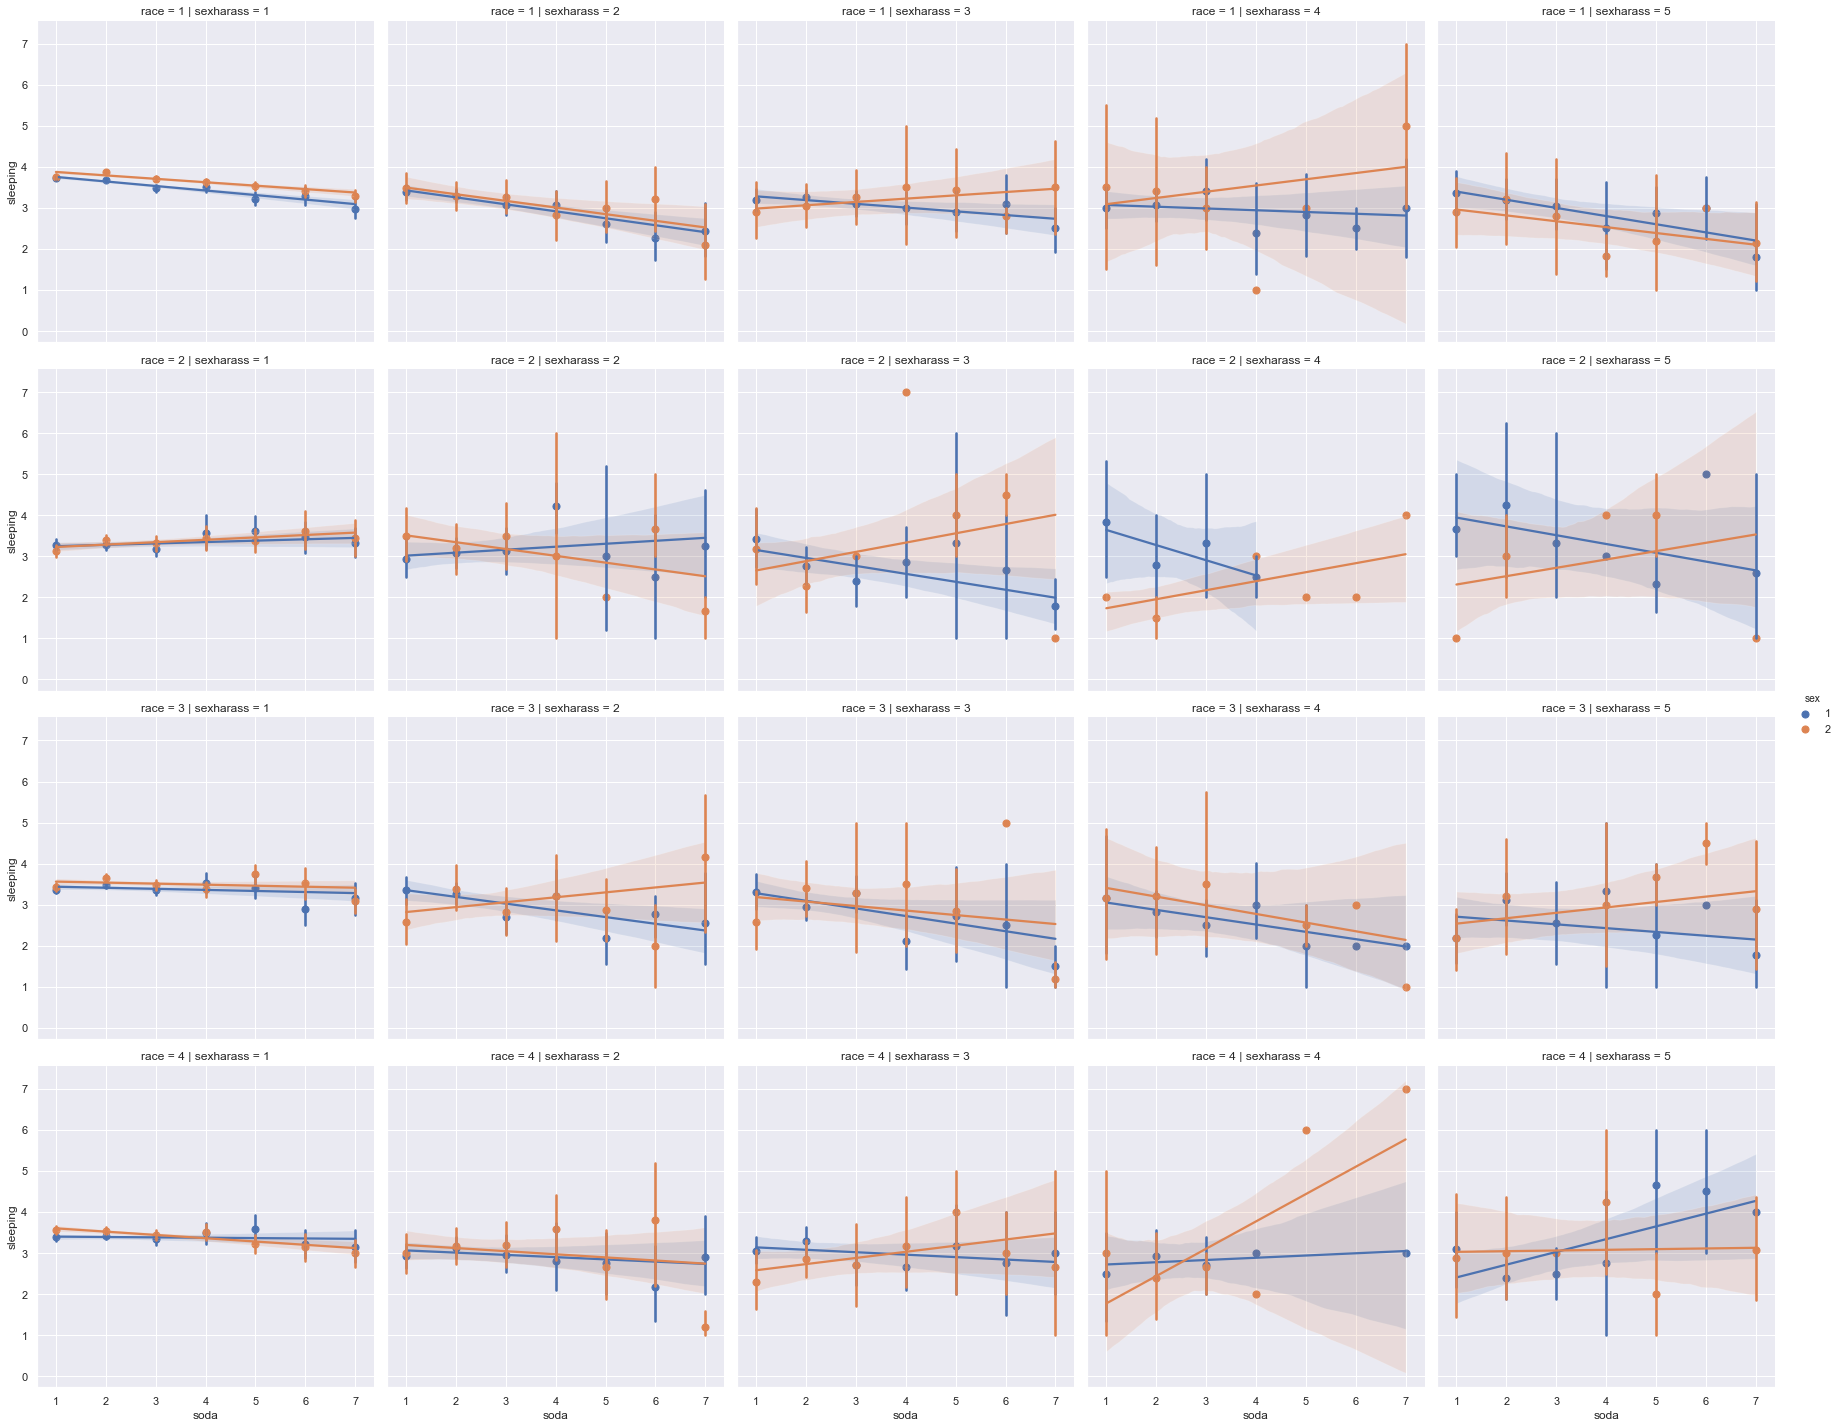

In [88]:
# trending functions
sns.lmplot(x="soda", y="sleeping", hue="sex", col="sexharass", row = 'race', data=df1, x_estimator=np.mean)
# Generally, female and male has similar satisfaction degree of health care: Hign income people with high social status 
# has higher satisfaction degree of health care regardless of gender and age. 

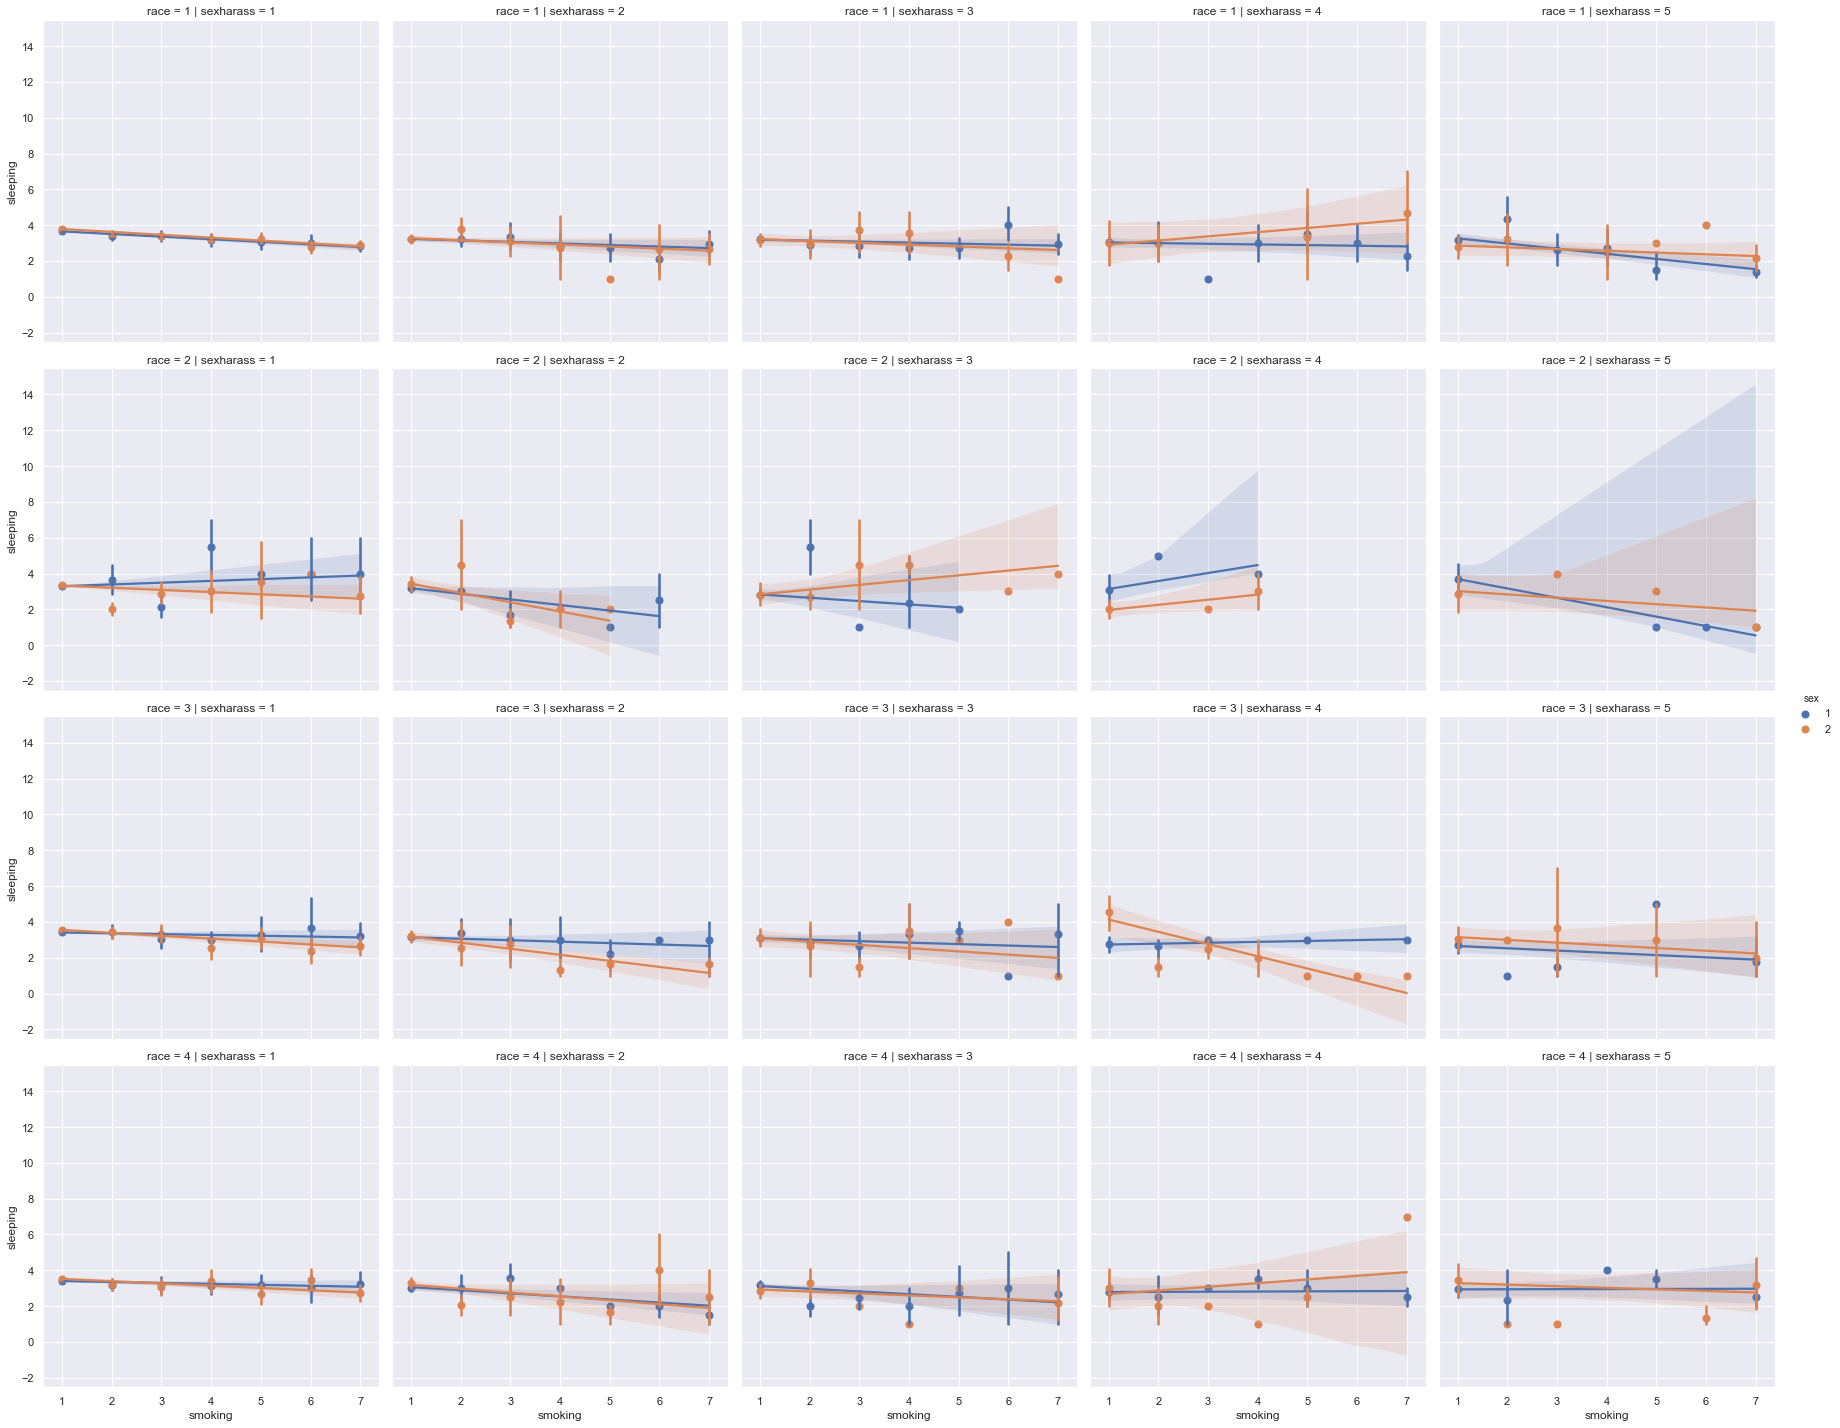

In [89]:
sns.lmplot(x="smoking", y="sleeping", hue="sex", col="sexharass", row = 'race', data=df1, x_estimator=np.mean)

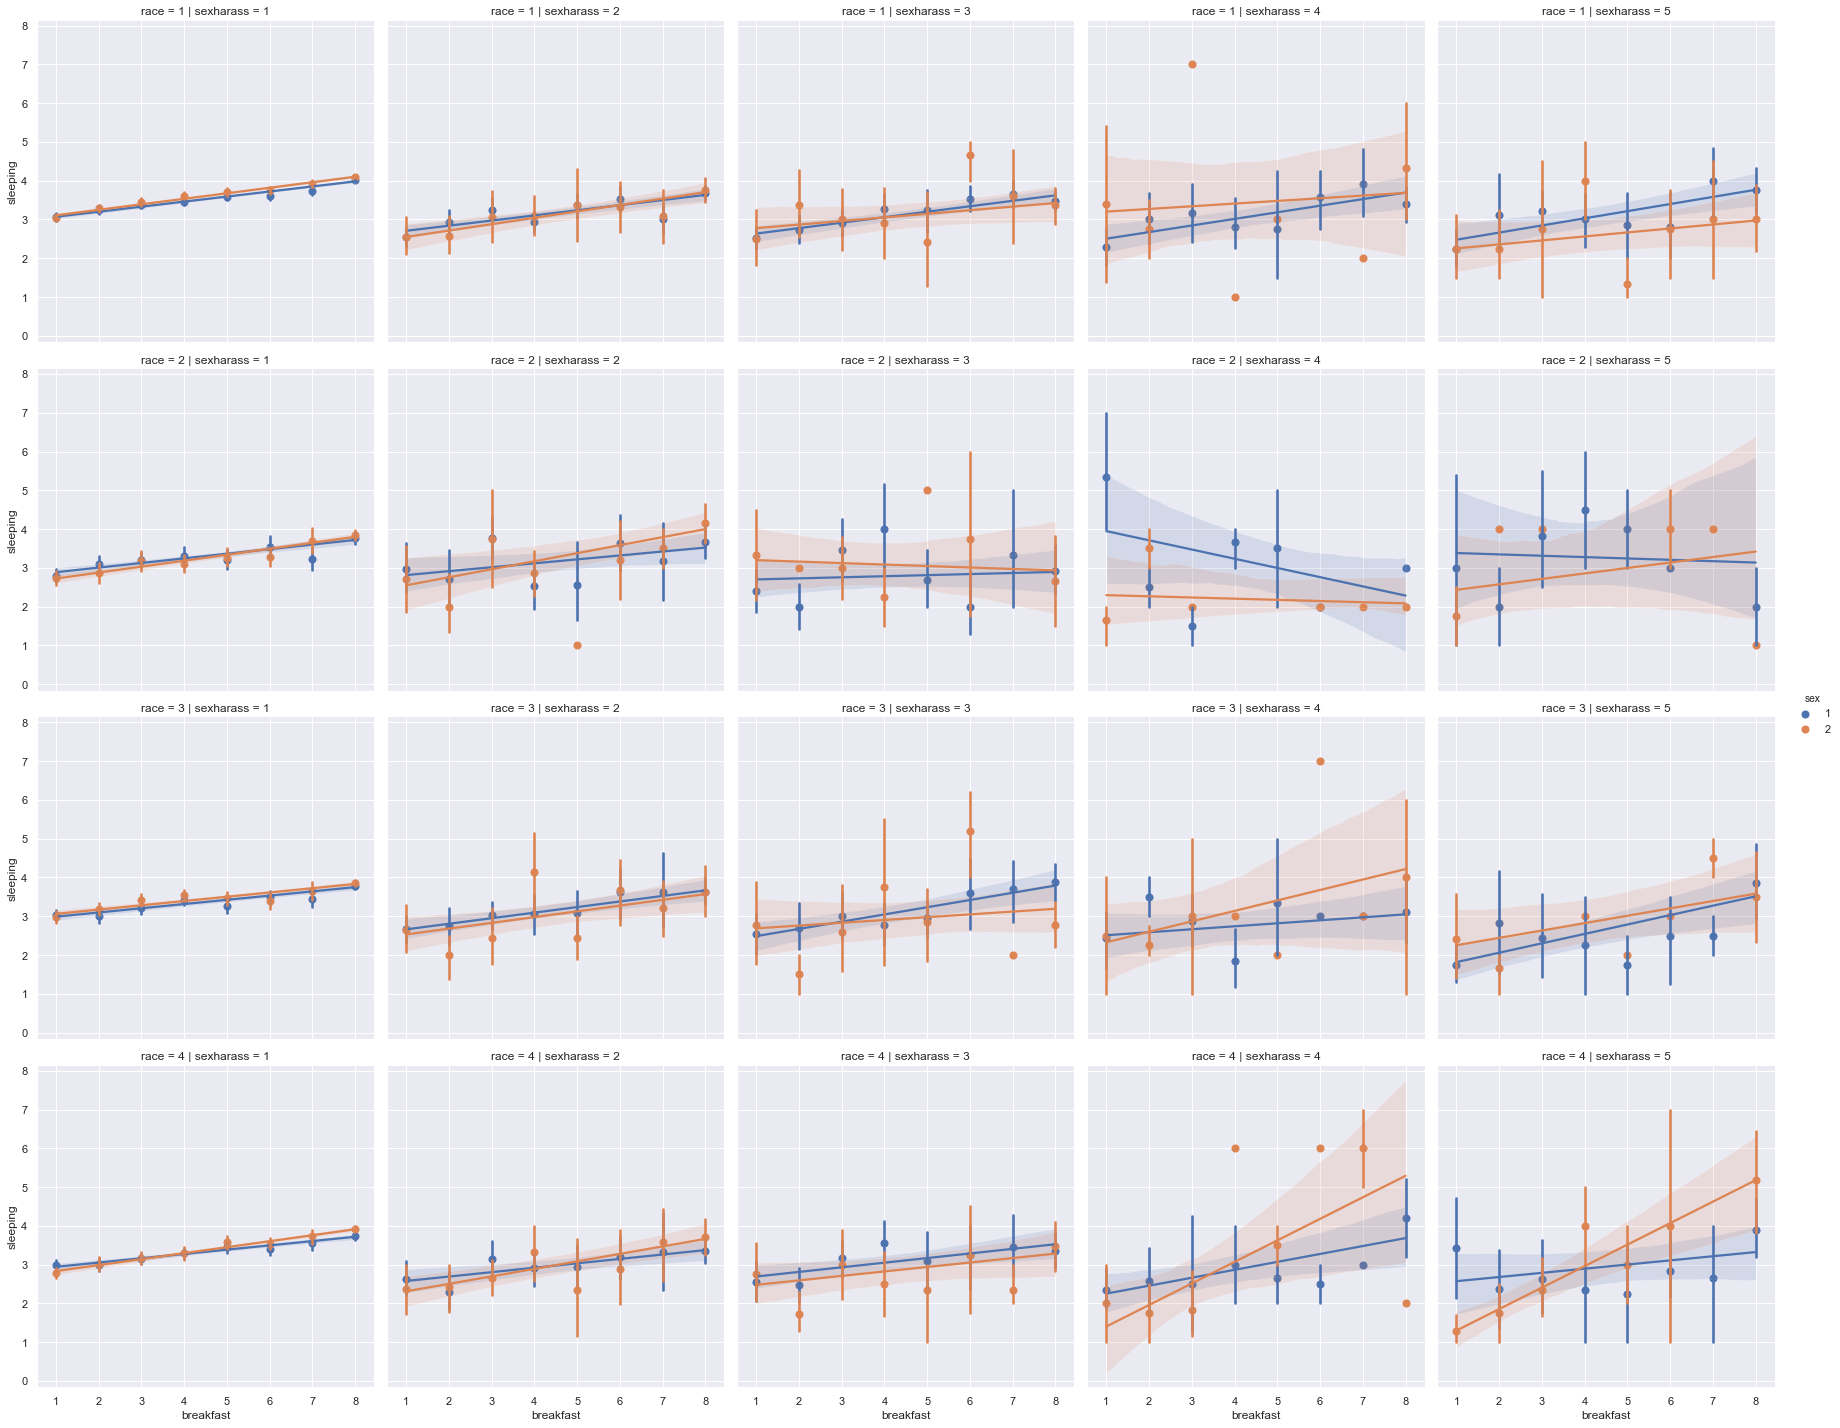

In [90]:
sns.lmplot(x="breakfast", y="sleeping", hue="sex", col="sexharass", row = 'race', data=df1, x_estimator=np.mean)

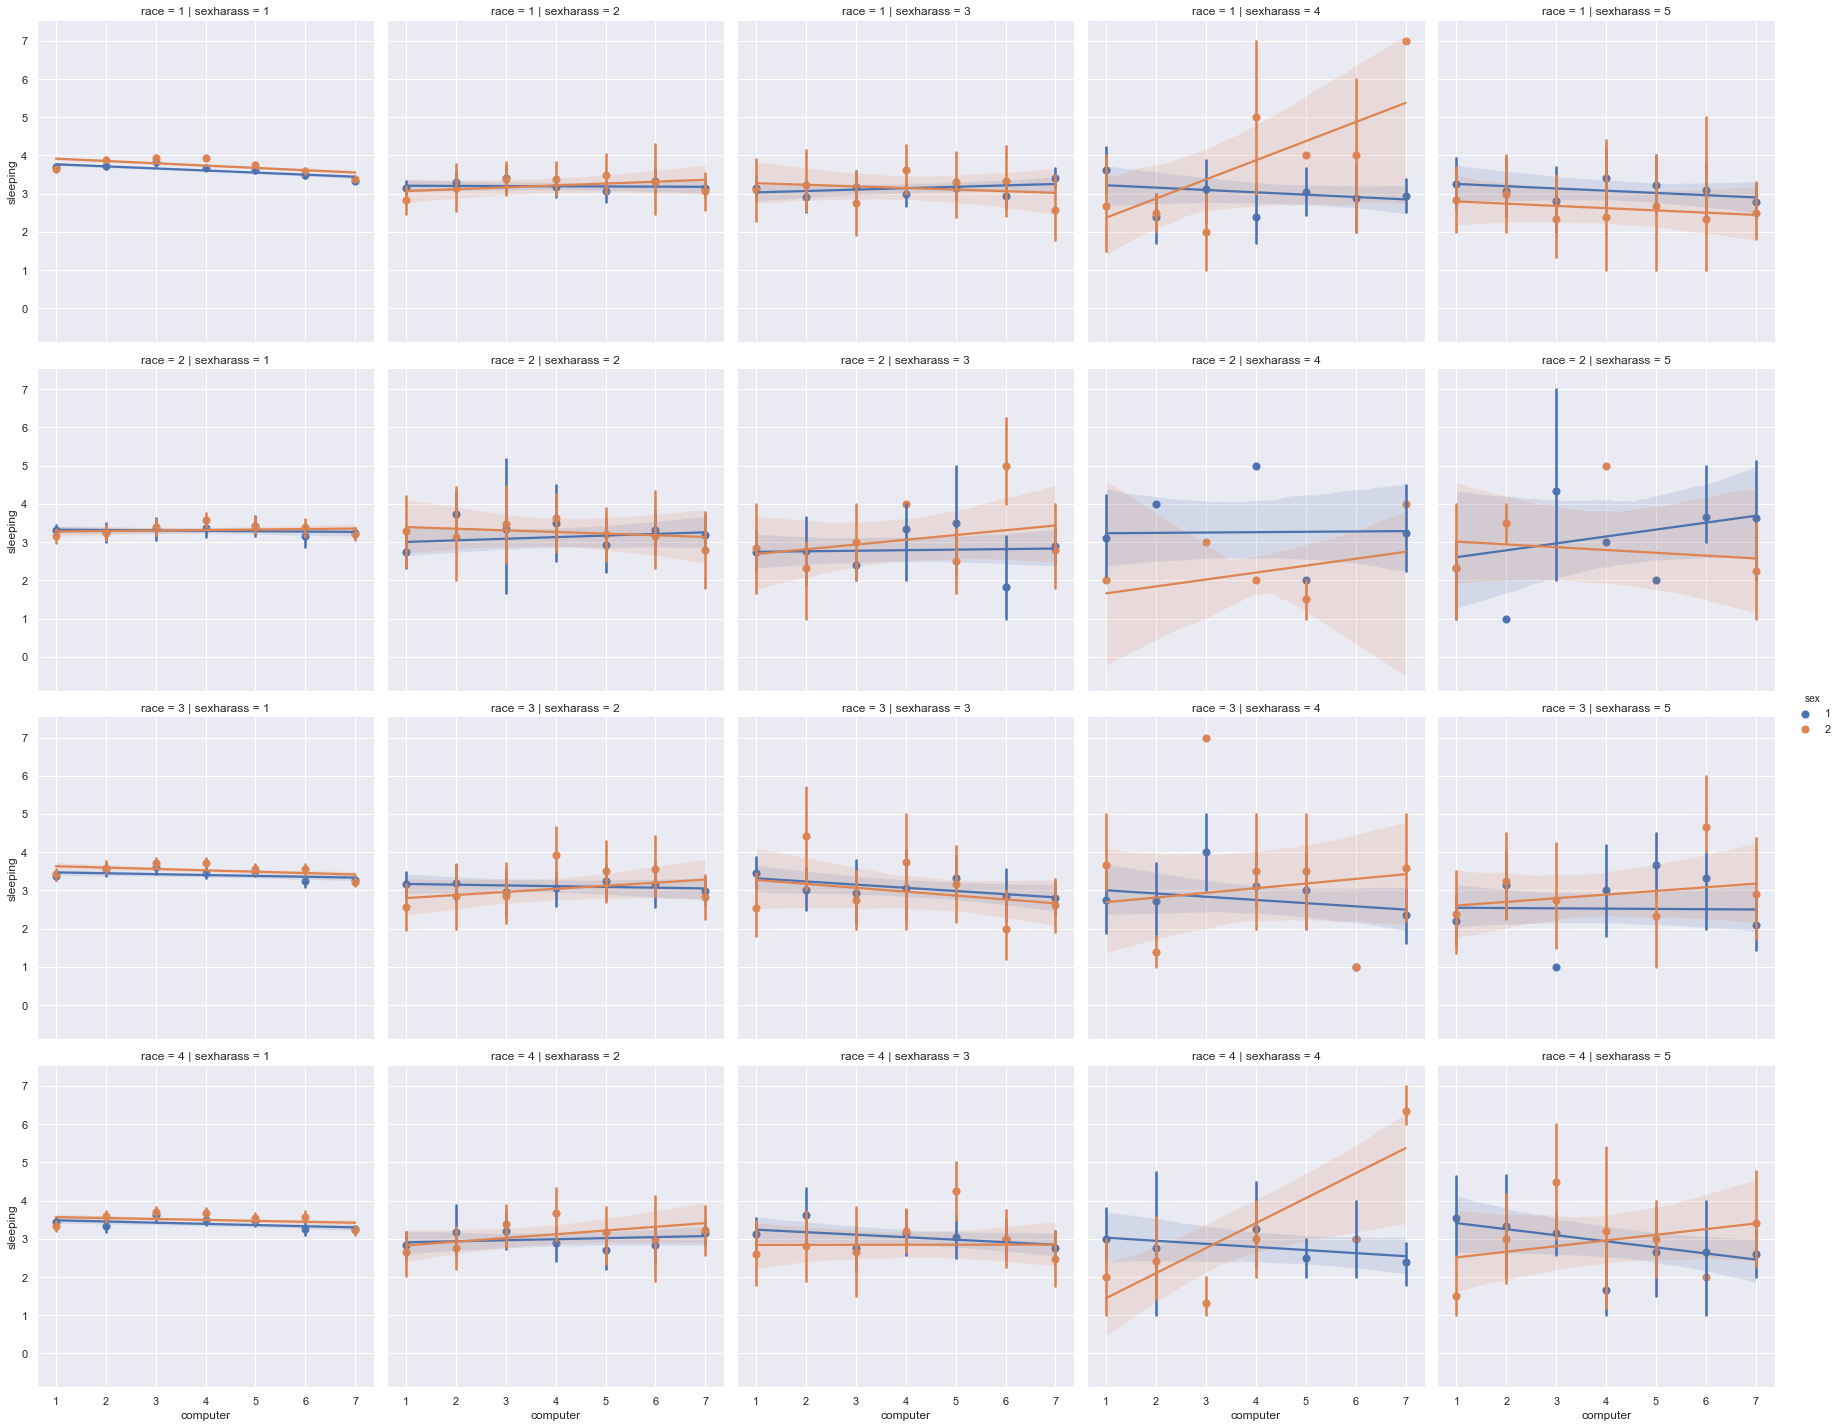

In [91]:
sns.lmplot(x="computer", y="sleeping", hue="sex", col="sexharass", row = 'race', data=df1, x_estimator=np.mean)

On average, there is not much difference between males and females regarding sleep duration without considering sexual harassments. If sexual harassment is included, females and males show different trend when the they were sexually harrassed more than 2 or 3 times during last year.



<a id='section_id5'></a>
### <span style="background-color:#B0E0E6">Saving files</span>

In [92]:
df1.columns


Index(['sleeping', 'sex', 'race', 'sexharass', 'smoking', 'vegetables', 'soda',
       'breakfast', 'computer'],
      dtype='object')

In [93]:
# write a DataFrame to a file. The output file is stored in your current working  directory.
df1.to_csv('sleeping.csv', index = False, na_rep = '?')